In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 

Make erosion and dilation

(628, 1200, 3)


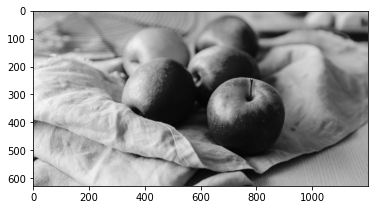

In [ ]:
image_path= '/content/drive/MyDrive/college/selected4/2.png'
#image_path='/content/drive/MyDrive/graduation-project/char/6.png'
im = cv2.imread(image_path)  
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 
plt.imshow(gray,cmap='gray')
print(im.shape)

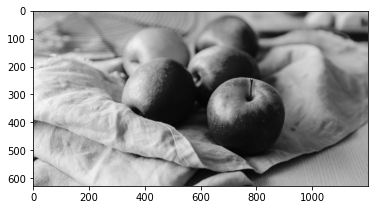

In [ ]:
#img = cv2.imread(noise, 0)
kernel = np.ones((5,5), np.uint8)
plt.imshow(gray,cmap='gray')

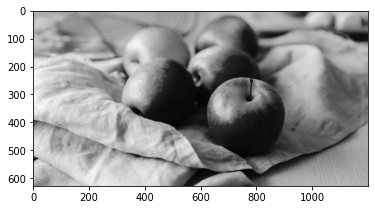

In [ ]:
img_erosion = cv2.erode(gray, kernel, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
#cv2.imwrite('/content/drive/MyDrive/graduation-project/char/dil33.png',img_dilation)
plt.imshow(img_dilation,cmap='gray')

Reduce noise

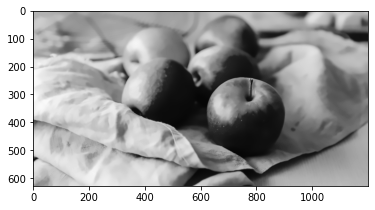

In [ ]:
img=cv2.imread(image_path)
noise = cv2.fastNlMeansDenoising(gray,None,10,7,21)
plt.imshow(noise,cmap='gray')

Apply opening and closing

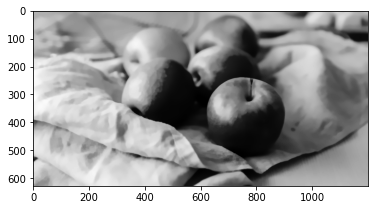

In [ ]:
opening = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')
#cv2.imwrite('/content/drive/MyDrive/graduation-project/char/close6.png',closing)

Image resize

<class 'numpy.ndarray'>
(628, 1200)
(250, 500)


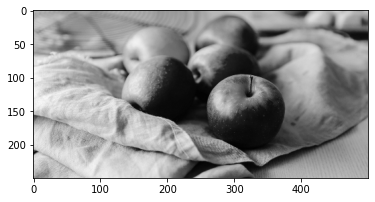

In [ ]:
#image_path='/content/drive/MyDrive/graduation-project/char/close6.png'
#im = cv2.imread(image_path)
print(type(gray))
print(gray.shape)
img_resize = cv2.resize(gray,(500,250))
print(img_resize.shape)
plt.imshow(img_resize,cmap='gray')
#cv2.imwrite('/content/drive/MyDrive/graduation-project/char/ed6.png',imm)

Make binary thresholding

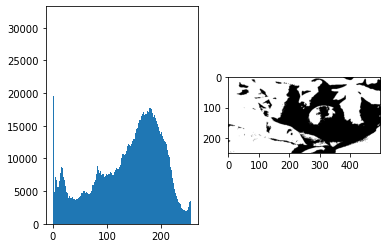

True

In [ ]:
#img = cv2.imread('/content/drive/MyDrive/graduation-project/char/ed33.png',0)
#ret1,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
ret1,th1 = cv2.threshold(img_resize,125,250,cv2.THRESH_BINARY)

images = [img, th1]
#plt.subplot(1,3,1),plt.imshow(images[0],cmap='gray')

plt.subplot(1,2,1),plt.hist(images[0].ravel(),256)

plt.subplot(1,2,2),plt.imshow(images[1],cmap='gray')

plt.show()
cv2.imwrite('/content/drive/MyDrive/graduation-project/char/edit6.png',th1)

Sharpen edge

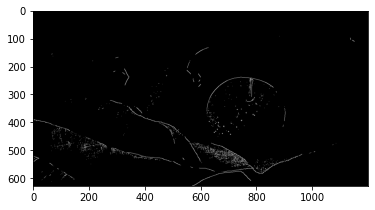

In [ ]:
#img_1 = cv2.imread('noise/1.png',cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(gray,200,200)
plt.imshow(edges,cmap='gray')

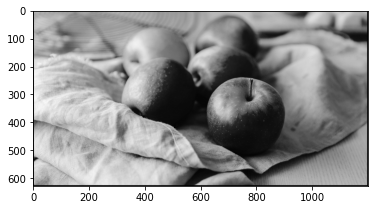

In [ ]:
cnts,new=cv2.findContours(gray.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img1=gray.copy()
cv2.drawContours(img1,cnts,-1,(0,255,0),3)
plt.imshow(img1,cmap="gray")

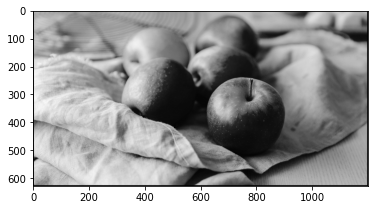

In [ ]:
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:30]
img2=gray.copy()
cv2.drawContours(img2,cnts,-1,(0,255,0),3)
plt.imshow(img2,cmap='gray')

Equalization

In [ ]:

import json
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src



def equalize_this(image_file, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    if not gray_scale:
        r_image, g_image, b_image = cv2.split(image_src)

        r_image_eq = cv2.equalizeHist(r_image)
        g_image_eq = cv2.equalizeHist(g_image)
        b_image_eq = cv2.equalizeHist(b_image)

        image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
        cmap_val = None
    else:
        image_eq = cv2.equalizeHist(image_src)
        cmap_val = 'gray'

    if with_plot:
        fig = plt.figure(figsize=(10, 20))

        ax1 = fig.add_subplot(2, 2, 1)
        ax1.axis("off")
        ax1.title.set_text('Original')
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.axis("off")
        ax2.title.set_text("Equalized")

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_eq, cmap=cmap_val)
        return True
    return image_eq

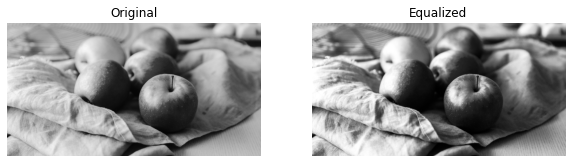

In [ ]:
img_equalize = equalize_this(image_file=image_path, with_plot=True, gray_scale=True)